In [1]:

# Introduction:

# Climate change is a very complex system, and I doubt we will ever understand every aspect of it. CO2 levels in the atmosphere
# are just one of may factors driving this system. This is a precursory look at temperature change and levels of atmospheric
# CO2 side by side. Let's see what that data says and if there are any trends in both data sets. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Tempchange data will not open in current utf-8 encoding so convert to latin and then back to utf-8
pd.set_option('display.max_rows', 500)
df = pd.read_csv("Datasets/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='latin')
df_co2 = pd.read_csv("Datasets/co2_emission.csv")
df.to_csv('Datasets/Environment_Temperature_Change', encoding='utf-8')
df = pd.read_csv('Datasets/Environment_Temperature_Change')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [5]:
df_co2.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [6]:
# Let's clean up the df a bit 
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('y', '')
df.drop(columns=['area code', 'element code', 'months code', 'unit'], inplace=True)
df.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [7]:
# let's get rid of the unnecessary years in df_c02 so it matches df.
df_co2.drop(columns=['Code'], inplace=True)
df_co2.columns = df_co2.columns.str.lower()
df_co2 = df_co2.loc[(df_co2.year >= 1961)]
df_co2.head()

,entity,year,annual co₂ emissions (tonnes )
12,Afghanistan,1961,490797.70
13,Afghanistan,1962,688594.27
14,Afghanistan,1963,706735.98
15,Afghanistan,1964,838550.83
16,Afghanistan,1965,1006916.53


In [8]:
# If we look at the unique values in the months column in df we only care about 'Meteorological year'
df.months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
       'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object)

In [9]:
# We can create a df with only the meteorlogical year in the months column
# We also want to split up the df by element because we are going to transpose it and we don't want columns with the same 
# country names
df = df.loc[(df.months == 'Meteorological year') & (df.element == 'Temperature change')]

In [10]:
df.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,-0.080,-0.120,0.882,-0.727,-0.200,0.176,-0.361,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
66,Albania,Meteorological year,Temperature change,0.631,0.339,0.084,-0.171,-0.392,0.551,-0.084,...,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
100,Algeria,Meteorological year,Temperature change,0.186,0.101,0.045,0.212,-0.135,0.404,-0.024,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.630,1.326,1.224
134,American Samoa,Meteorological year,Temperature change,-0.014,-0.080,0.072,-0.226,-0.473,0.177,-0.402,...,1.271,0.790,0.901,1.159,1.086,0.885,1.648,1.268,1.101,1.502
168,Andorra,Meteorological year,Temperature change,0.749,0.110,-0.755,0.305,-0.500,0.403,0.616,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871


In [11]:
# Let's add the average temp change of each row as a column to df.
newcol = df.mean(axis=1)
df = pd.concat([df, newcol], axis=1)
df = df.rename(columns={0:'temp change ave'})
df.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,temp change ave
32,Afghanistan,Meteorological year,Temperature change,-0.080,-0.120,0.882,-0.727,-0.200,0.176,-0.361,...,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893,0.432322
66,Albania,Meteorological year,Temperature change,0.631,0.339,0.084,-0.171,-0.392,0.551,-0.084,...,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911,0.485492
100,Algeria,Meteorological year,Temperature change,0.186,0.101,0.045,0.212,-0.135,0.404,-0.024,...,1.492,1.238,1.267,1.774,1.224,1.866,1.630,1.326,1.224,0.711153
134,American Samoa,Meteorological year,Temperature change,-0.014,-0.080,0.072,-0.226,-0.473,0.177,-0.402,...,0.790,0.901,1.159,1.086,0.885,1.648,1.268,1.101,1.502,0.465000
168,Andorra,Meteorological year,Temperature change,0.749,0.110,-0.755,0.305,-0.500,0.403,0.616,...,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871,0.691475


In [12]:
# function to grab a country out of df
def get_country(df, area):
    dfn = df.loc[(df.area == area) & (df.element == 'Temperature change')]
    dfn = dfn.set_index('area').transpose()[2:]
    dfn['year'] = dfn.index
    dfn = dfn.drop('temp change ave', axis=0)
    dfn = dfn.astype('float')
    return dfn

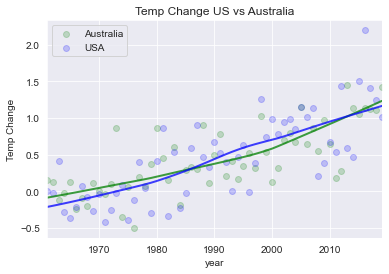

In [13]:
# Let's look at the temperature change for two countries as far away as possible 
# Looks like the trends are the same. 
df_australia = get_country(df, 'Australia')
df_usa = get_country(df, 'United States of America')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.title("Temp Change US vs Australia")
sns.regplot(data=df_australia, x='year', y='Australia', fit_reg=True, lowess=True, scatter_kws={'alpha':0.2}, line_kws={'lw':2, 'alpha':0.75}, color='g', label='Australia')
sns.regplot(data=df_usa, x='year', y='United States of America', fit_reg=True, lowess=True, scatter_kws={'alpha':0.2}, line_kws={'lw':2, 'alpha':0.75}, color='b', label='USA')
ax.set_ylabel('Temp Change')
plt.legend()
plt.show()

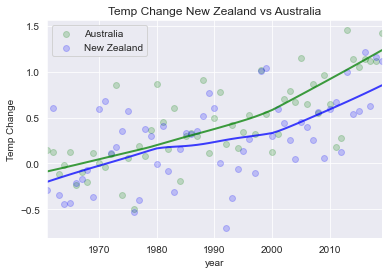

In [14]:
# New Zealand is a much smaller country. It is also composed of 2 main islands, and the ocean keeps the temp change lower.
df_nz = get_country(df, 'New Zealand')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.title("Temp Change New Zealand vs Australia")
sns.regplot(data=df_australia, x='year', y='Australia', fit_reg=True, lowess=True, scatter_kws={'alpha':0.2}, line_kws={'lw':2, 'alpha':0.75}, color='g', label='Australia')
sns.regplot(data=df_nz, x='year', y='New Zealand', fit_reg=True, lowess=True, scatter_kws={'alpha':0.2}, line_kws={'lw':2, 'alpha':0.75}, color='b', label='New Zealand')
ax.set_ylabel('Temp Change')
plt.legend()
plt.show()

In [15]:
# Alot of the rows are missing values. All of the countries with the largest temperature change average are missing the
# the early years. While all of the countries with the lowest temperature change average are missing the later years. 
# It is interesting. This missing data actually points to more rapid temperature change in recent years 
# Mongolia and Svalbard are the places that have the highest average temperature change and also have data for all years.
# upon a quick google search Mongolia and Svalbard have had major issues with climate change. 

df_change_sorted = df.sort_values('temp change ave')
df_change_sorted

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,temp change ave
5132,Nauru,Meteorological year,Temperature change,-0.368,NaN,NaN,NaN,NaN,-0.518,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.103353
5914,Pitcairn Islands,Meteorological year,Temperature change,0.598,0.146,0.219,0.282,0.269,-0.448,0.425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023980
2616,Falkland Islands (Malvinas),Meteorological year,Temperature change,-0.351,0.401,-0.286,-0.082,0.178,-0.606,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008000
4826,Midway Island,Meteorological year,Temperature change,0.130,0.256,0.721,0.477,-0.394,-0.053,0.580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020188
5608,Pacific Islands Trust Territory,Meteorological year,Temperature change,0.025,0.020,0.118,-0.075,-0.207,0.086,-0.069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033067
8328,Yugoslav SFR,Meteorological year,Temperature change,0.922,-0.098,-0.272,-0.487,-0.532,0.686,0.273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035387
4588,Marshall Islands,Meteorological year,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004,0.356,0.349,0.412,0.299,0.608,0.416,0.203,0.420,0.098828
6968,South Georgia and the South Sandwich Islands,Meteorological year,Temperature change,-0.386,0.224,-0.304,NaN,0.106,-0.344,-0.153,...,0.514,-0.159,-0.423,-0.162,0.004,-0.188,0.662,0.704,0.082,0.138115
8294,Yemen,Meteorological year,Temperature change,0.033,-0.006,0.168,-0.251,-0.624,0.087,-0.259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143871
2072,Czechoslovakia,Meteorological year,Temperature change,1.160,-0.571,-0.722,-0.678,-1.008,0.708,0.804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144000


In [16]:
# Let's look at temp change by contintent (more or less).
df_areas = df.loc[df.area.isin(['World', 'Africa',
'Northern America', 'Central America', 'South America', 'Asia','Europe', 'Australia and New Zealand'])]
df_areas

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,temp change ave
8430,World,Meteorological year,Temperature change,0.207,0.034,0.159,-0.253,-0.226,0.201,-0.114,...,0.923,1.081,1.021,1.052,1.419,1.674,1.440,1.301,1.473,0.523542
8464,Africa,Meteorological year,Temperature change,-0.017,-0.040,0.064,-0.153,-0.197,0.138,-0.209,...,0.949,0.781,1.014,1.036,1.208,1.442,1.224,1.222,1.415,0.491475
8702,Northern America,Meteorological year,Temperature change,0.017,-0.058,0.372,-0.285,-0.594,-0.185,-0.195,...,1.002,1.786,0.902,0.389,1.330,2.273,1.426,0.873,1.179,0.522983
8736,Central America,Meteorological year,Temperature change,-0.139,0.114,0.154,-0.261,-0.076,-0.196,-0.148,...,0.935,0.827,0.772,0.824,1.094,1.284,1.425,1.121,1.307,0.379373
8804,South America,Meteorological year,Temperature change,0.116,-0.139,0.139,-0.217,-0.015,0.007,-0.001,...,0.721,0.943,0.834,1.105,1.435,1.242,1.232,1.034,1.310,0.452559
8838,Asia,Meteorological year,Temperature change,0.049,-0.008,0.266,-0.166,-0.033,0.326,-0.308,...,0.701,0.693,1.054,0.909,1.284,1.457,1.464,1.343,1.369,0.473000
9042,Europe,Meteorological year,Temperature change,0.874,0.300,0.103,-0.523,-0.430,0.724,0.174,...,1.548,1.789,1.118,1.807,2.106,2.286,1.959,2.009,2.116,0.731712
9246,Australia and New Zealand,Meteorological year,Temperature change,0.136,0.139,-0.122,-0.036,0.108,-0.237,-0.095,...,0.192,0.268,1.435,1.119,1.035,1.144,1.101,1.114,1.413,0.427847


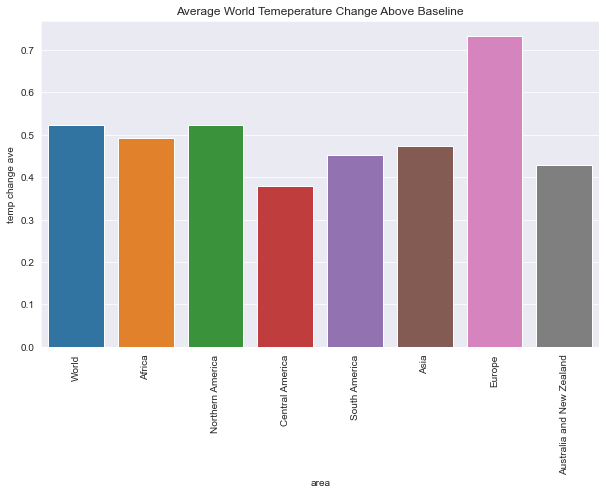

In [17]:
# The world has risen 0.5 degrees C over the baseline temp taken from 1951-1980. Central America has the lowest temperature 
# rise while Europe in general has the highest. North America Falls at the average

plt.figure(figsize=(10,6))
plt.title('Average World Temeperature Change Above Baseline')
sns.barplot(data=df_areas, x='area', y='temp change ave' )
plt.xticks(rotation=90);

In [18]:
# Let's look at this data but over time now
# We need to transpose df_areas so we have all the areas in their own columns
df_areasline = df_areas.set_index('area').transpose()[2:]
df_areasline = df_areasline.drop('temp change ave')
df_areasline = df_areasline.astype('float')
df_areasline.head()

area,World,Africa,Northern America,Central America,South America,Asia,Europe,Australia and New Zealand
1961,0.207,-0.017,0.017,-0.139,0.116,0.049,0.874,0.136
1962,0.034,-0.040,-0.058,0.114,-0.139,-0.008,0.300,0.139
1963,0.159,0.064,0.372,0.154,0.139,0.266,0.103,-0.122
1964,-0.253,-0.153,-0.285,-0.261,-0.217,-0.166,-0.523,-0.036
1965,-0.226,-0.197,-0.594,-0.076,-0.015,-0.033,-0.430,0.108


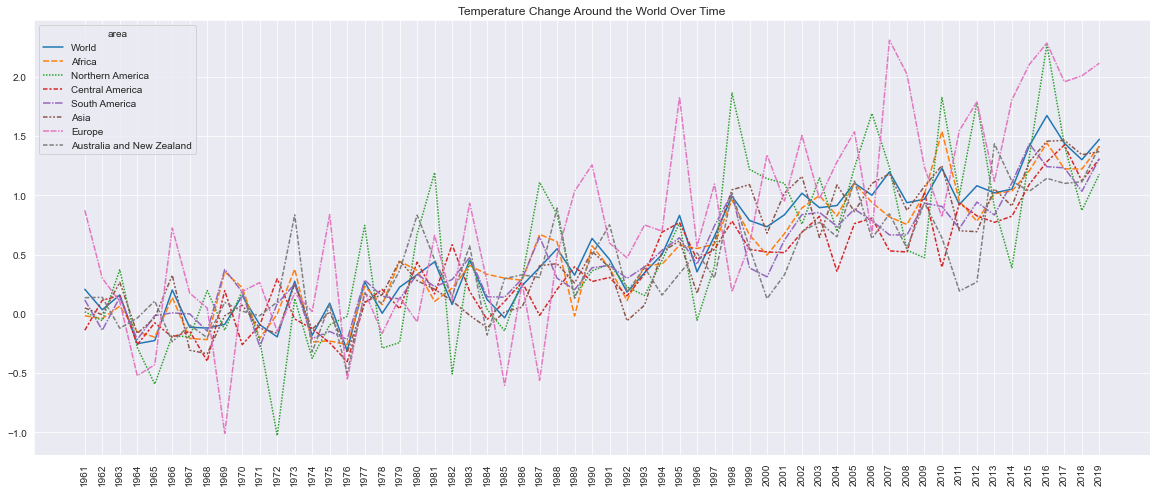

In [19]:
# Here we see a general increase in temperature change over time. We also see that North America and Europe consistently 
# have the greatest flucuations in temperature.

plt.figure(figsize=(20,8)),
plt.title("Temperature Change Around the World Over Time"),
sns.lineplot(data=df_areasline),
plt.xticks(rotation=90);

In [20]:
# Switching our attention to the CO2 data.
df_co2.head()

,entity,year,annual co₂ emissions (tonnes )
12,Afghanistan,1961,490797.70
13,Afghanistan,1962,688594.27
14,Afghanistan,1963,706735.98
15,Afghanistan,1964,838550.83
16,Afghanistan,1965,1006916.53


In [21]:
# We want to see the average emissions of all of the countries in df_co2 by country. Let's write some functions.
# average function to take the average of a list of numbers
# emiss_avg to call and return the average emissions of any country in df_co2
def average(num):
    sumofnums = 0
    for x in num: 
        sumofnums = sumofnums + x
    
    avg = sumofnums / len(num)
    return avg

def emiss_avg(c):
    dfc = df_co2.loc[df_co2.entity == c]
    emiss = dfc['annual co₂ emissions (tonnes )']
    return average(emiss)

In [22]:
lst1 = []
for c in df_co2.entity:
    lst1.append(emiss_avg(c))

lst2 = [] 
for c in df_co2.entity:
    lst2.append(c)

co2_by_country = dict(zip(lst1, lst2))

In [23]:
co2_by_country

{3092102.8408771926: 'Afghanistan',
 703128796.0228071: 'Africa',
 4569224.091578947: 'Albania',
 71025081.37350877: 'Algeria',
 1500533197.5701754: 'Americas (other)',
 489906.33142857143: 'Andorra',
 10861327.241754385: 'Angola',
 108574.22607142858: 'Anguilla',
 7328.0: 'Antarctic Fisheries',
 379639.8084210526: 'Antigua and Barbuda',
 122893533.24157897: 'Argentina',
 4716546.798421052: 'Armenia',
 1278840.2603508772: 'Aruba',
 2935188341.9771934: 'Asia and Pacific (other)',
 268534782.2063159: 'Australia',
 59180015.79491228: 'Austria',
 42536501.05578948: 'Azerbaijan',
 2733344.163157894: 'Bahamas',
 13476471.399473682: 'Bahrain',
 23808688.9254386: 'Bangladesh',
 879004.4389473686: 'Barbados',
 69908070.32543859: 'Belarus',
 116874306.61578946: 'Belgium',
 295113.42315789475: 'Belize',
 1726382.7998245612: 'Benin',
 455045.33789473685: 'Bermuda',
 286722.2891666667: 'Bhutan',
 7903027.605964914: 'Bolivia',
 366296.42203703703: 'Bonaire Sint Eustatius and Saba',
 14550725.8931579

In [24]:
# Let's sort the data, turn it into a pandas df and rename the columns
co2_sorted = pd.DataFrame(sorted(co2_by_country.items()))
co2_sorted = co2_sorted.rename(columns={0:'co2', 1:'place'})

In [25]:
# Now let's get rid of some of the vauge places
co2_sorted = co2_sorted.drop([230, 228, 227, 225, 224, 220], axis=0)
co2_sorted

,co2,place
0,-1.388103e+08,Statistical differences
1,0.000000e+00,Kyrgysztan
2,5.657887e+03,Niue
3,7.328000e+03,Antarctic Fisheries
4,9.113389e+03,Saint Helena
5,9.175806e+03,Tuvalu
6,2.526901e+04,Wallis and Futuna Islands
7,2.749561e+04,Montserrat
8,3.357710e+04,Kiribati
9,3.692185e+04,Falkland Islands


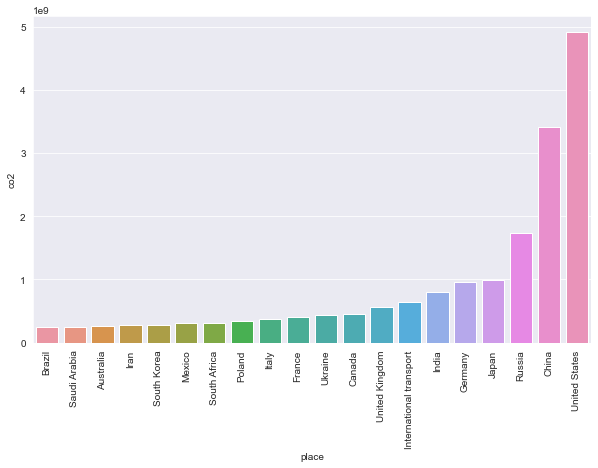

In [26]:
# Here is a chart of the top 20 countries that produce the most co2 averaged from 1961, 2019. I left in international
# transportation because I think it is interesting to see how much co2 shipping creates. America and China have produced 
# the most co2 by far

plt.figure(figsize=(10,6)),
sns.barplot(data=co2_sorted[206:226], x='place', y='co2'),
plt.xticks(rotation=90);

In [27]:
# Let's look at the US's carbon emissions 
df_co2usa = df_co2.loc[df_co2.entity == 'United States']

# We can put the data from df and co2 into one data frame 
df_allusa = pd.merge(df_usa, df_co2usa)
df_allusa = df_allusa.rename(columns={'United States of America':'temp change'})
df_allusa.head()

,temp change,year,entity,annual co₂ emissions (tonnes )
0,0.000,1961.0,United States,2.877370e+09
1,-0.023,1962.0,United States,2.984002e+09
2,0.418,1963.0,United States,3.116022e+09
3,-0.285,1964.0,United States,3.252755e+09
4,-0.358,1965.0,United States,3.388193e+09


C:\Users\eagru\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eagru\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


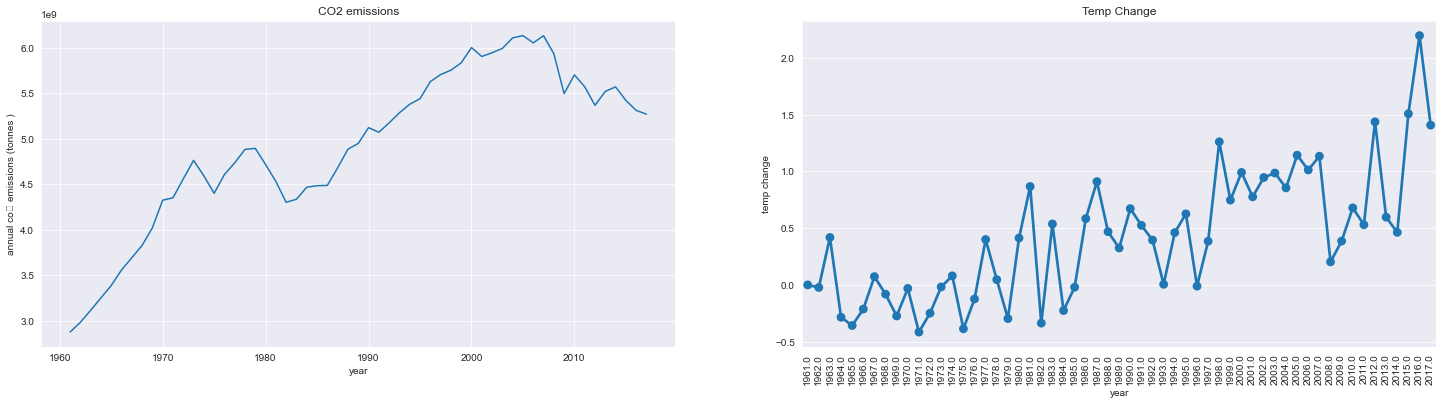

In [28]:
# Here we look at temperature change and CO2 emissions in the US side by side. It is obvious that temp change fluctuates more
# from year to year. Both CO2 and temp change show upwards trends. With a reduction in emissions over the past 10 years.
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(25)
sns.lineplot(x=df_allusa['year'], y=df_allusa['annual co₂ emissions (tonnes )'], ax=ax1)
sns.pointplot(x=df_allusa['year'], y=df_allusa['temp change'], ax=ax2)
ax1.title.set_text("CO2 emissions")
ax2.title.set_text("Temp Change")
plt.xticks(rotation=90);

In [29]:
# Let's look at the world as a whole
df_worldtemp = get_country(df, 'World')
df_co2world = df_co2.loc[df_co2.entity == 'World']

df_allworld = pd.merge(df_worldtemp, df_co2world)
df_allworld.rename(columns={'World':'temp change'}, inplace=True)

In [30]:
df_allworld.head()

,temp change,year,entity,annual co₂ emissions (tonnes )
0,0.207,1961.0,World,9.452108e+09
1,0.034,1962.0,World,9.838202e+09
2,0.159,1963.0,World,1.037907e+10
3,-0.253,1964.0,World,1.096933e+10
4,-0.226,1965.0,World,1.146615e+10


C:\Users\eagru\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eagru\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


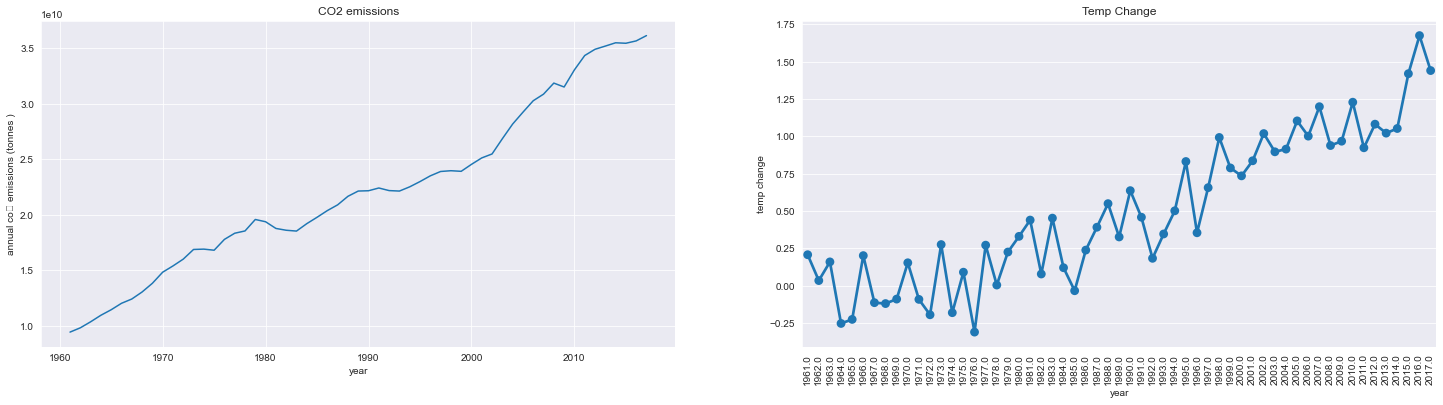

In [31]:
# same plot as we did with the US. The trend of increasing CO2 emissions and incresing temperature change is much more obvious
# here though. Also worth noting is that CO2 emissions have not dropped off in the past decade. 

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(25)
sns.lineplot(x=df_allworld['year'], y=df_allworld['annual co₂ emissions (tonnes )'], ax=ax1)
sns.pointplot(x=df_allworld['year'], y=df_allworld['temp change'], ax=ax2)
ax1.title.set_text("CO2 emissions")
ax2.title.set_text("Temp Change")
plt.xticks(rotation=90);

In [32]:

# Summary:

# From the data that was just analyzed it looks like both CO2 emissions and temperature change are both going up. CO2 is a 
# known greenhouse gas (a gas that traps heat in the atmosphere). Humans through the use of fossil fuels have been adding 
# more CO2 to the atmosphere than the Earth's natural Carbon Cycle can handle. The Carbon Cycle is the movement of carbon 
# from the air, to the sea and to the ground. Europe has had the largest increse in temperature over the period of time that 
# we looked at. The US has by far been the largest producer of CO2. It is also interesting to note that temperature rise in 
# both the US and Australia are very similar.

